<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [101]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [103]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [104]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [105]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [128]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [129]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [130]:
tesla_share_price_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [137]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [110]:
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [111]:
data  = requests.get(url).text
#print(data)

soup = BeautifulSoup(data, "html.parser")
#print(soup.prettify())

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

table = soup.find_all("tbody")[1]  # Ensure this is the correct table

import pandas as pd
# Initialize an empty list to collect data
data_list = []

for row in table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) > 1:  # Check if there are enough columns
        date = columns[0].text.strip()  # Extract and clean the date
        revenue = columns[1].text.strip()  # Extract and clean the revenue
        # Collect the data in the list
        data_list.append({"Date": date, "Revenue": revenue})

# Convert the list to a DataFrame
tesla_revenue = pd.DataFrame(data_list)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Remove any rows with null values
tesla_revenue.dropna(inplace=True)

# Remove any rows where the 'Revenue' column is an empty string
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


In [112]:
from yfinance import Ticker

# Create a ticker object for GameStop
gme_ticker = Ticker("GME")

In [113]:
# Extract stock information for GameStop
gme_data = gme_ticker.history(period="max")

In [114]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [115]:
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2  = requests.get(url).text
#print(html_data_2)

In [116]:

soup = BeautifulSoup(html_data_2, "html.parser")
#print(soup.prettify())

In [117]:
table = soup.find_all("tbody")[1]  # Ensure this is the correct table

In [118]:
import pandas as pd

# Initialize an empty list to collect data
data_list = []

for row in table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) > 1:  # Check if there are enough columns
        date = columns[0].text.strip()  # Extract and clean the date
        revenue = columns[1].text.strip()  # Extract and clean the revenue
        # Collect the data in the list
        data_list.append({"Date": date, "Revenue": revenue})

# Convert the list to a DataFrame
gme_revenue = pd.DataFrame(data_list)

In [119]:
gme_revenue["Revenue"] = data_frame['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = data_frame[data_frame['Revenue'] != ""]

In [120]:
# Display the last five rows of the gme_revenue DataFrame
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


In [123]:
!pip install matplotlib

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2019-01-02  20.674667  21.008667  19.920000  20.406668  174879000
1      2019-01-03  20.024000  20.626667  19.825333  20.466667  104478000
2      2019-01-04  21.179333  21.200001  20.181999  20.400000  110911500
3      2019-01-07  22.330667  22.449333  21.183332  21.448000  113268000
4      2019-01-08  22.356667  22.934000  21.801332  22.797333  105127500


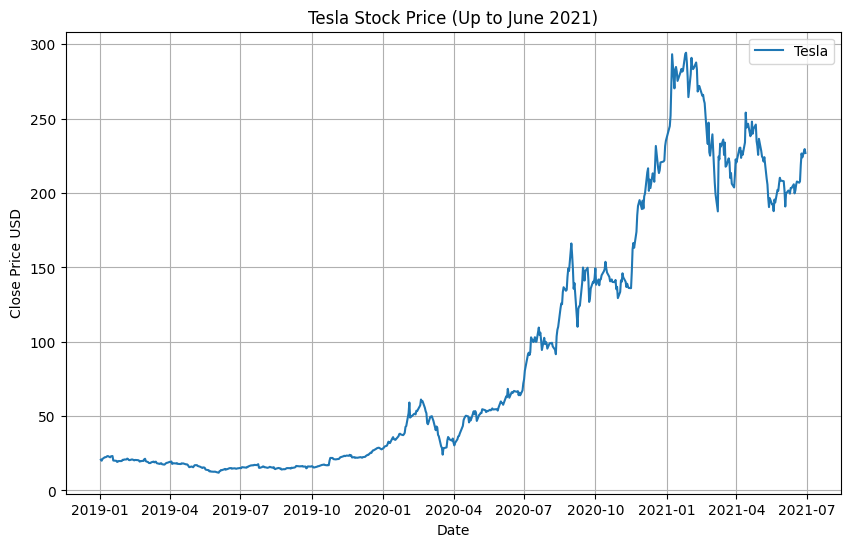

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2019-01-01", end="2021-06-30")

# Reset index to have 'Date' as a column
tesla_data.reset_index(inplace=True)

# Display the cleaned dataframe
print(tesla_data.head())

# Define make_graph function
def make_graph(stock_data, stock_name):
    # Filter data up to June 2021
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    filtered_data = stock_data[stock_data['Date'] <= '2021-06-30']

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['Date'], filtered_data['Close'], label=stock_name)  # use 'Close' column for stock price
    plt.title(f"{stock_name} Stock Price (Up to June 2021)")
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for Tesla
make_graph(tesla_data, "Tesla")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [134]:
pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


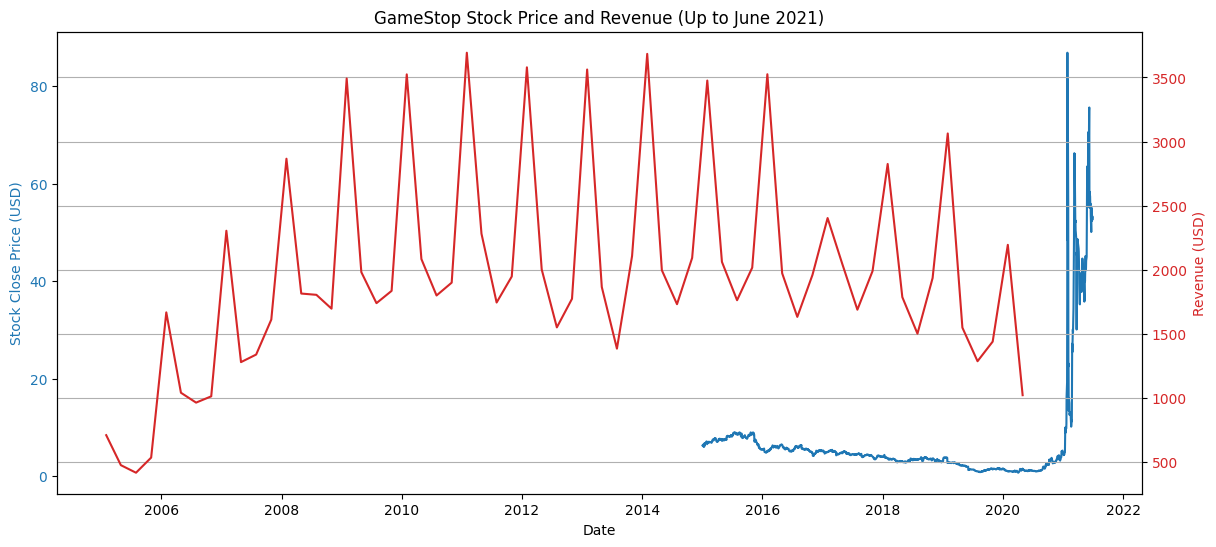

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download GameStop Stock Data
gme_data = yf.download('GME', start='2015-01-01', end='2021-06-30')

# Step 2: Read GameStop Revenue table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
tables = pd.read_html(url)
gme_revenue = tables[1]

# Step 3: Clean the revenue table
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace('[\$,]', '', regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "-"]
gme_revenue.dropna(inplace=True)
gme_revenue.reset_index(drop=True, inplace=True)

# Step 4: Define make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    stock_data.index = pd.to_datetime(stock_data.index)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Filter stock data upto June 2021
    stock_data = stock_data[stock_data.index <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    fig, ax1 = plt.subplots(figsize=(14, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Close Price (USD)', color=color)
    ax1.plot(stock_data.index, stock_data['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Revenue (USD)', color=color)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f"{stock_name} Stock Price and Revenue (Up to June 2021)")
    plt.grid()
    plt.show()

# Step 5: Call the function
make_graph(gme_data, gme_revenue, "GameStop")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
